# Objective:
## Predict whether an asteroid is hazardous to Earth based on its characteristics using machine learning.
[Download the dataset](https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects)
### 
The dataset contains information about Near-Earth Objects (NEOs) including:
- Estimated diameter (min and max)
- Relative velocity
- Miss distance from Earth
- Absolute magnitude (brightness)
- Orbiting body (all Earth in this dataset)
- Sentry object flag (monitoring status)
- Hazardous classification (True/False)

We will build a binary classification model to predict the 'hazardous' status (True/False) 
of asteroids based on their physical characteristics and orbital parameters.

### 


## 1. Loading the DataSet

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("neo.csv")

In [112]:
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [114]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [115]:
print("\nSummary:")
print(f"Total asteroids in dataset: {len(df)}")
print(f"Number of hazardous asteroids: {df['hazardous'].sum()} ({df['hazardous'].mean()*100:.2f}%)")
print(f"Number of non-hazardous asteroids: {len(df) - df['hazardous'].sum()} ({(1-df['hazardous'].mean())*100:.2f}%)")


Summary:
Total asteroids in dataset: 90836
Number of hazardous asteroids: 8840 (9.73%)
Number of non-hazardous asteroids: 81996 (90.27%)


## 2. DATA PREPROCESSING
- Missing Values:
  - Identify and handle missing data (impute or drop as appropriate).
- Data Cleaning:
  - Remove duplicates, correct data types.
- Encoding Categorical Variables:
  - Convert hazardous, sentry_object, etc., to numeric codes if needed.
- Scaling/Normalization:
  - Standardize continuous variables for certain algorithms.

### 2.1 - Missing Value Handling 

In [118]:
# 1. Missing Values Handling
print("=== Missing Values Handling ===")
print("\nMissing values :")
print(df.isnull().sum())

=== Missing Values Handling ===

Missing values :
id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


#### No Missing values Found ! 
So, We can proceed further without any imputation.

### 2.2 - Data Cleaning

In [121]:
# 2. Data Cleaning
print("\n=== Data Cleaning ===")
# Remove duplicates
print(f"Number of duplicates before : {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of duplicates After : {df.duplicated().sum()}")

# Correct data types
# ( Converting the column(s) to a strict boolean type (True/False) ).
df['sentry_object'] = df['sentry_object'].astype('bool')
df['hazardous'] = df['hazardous'].astype('bool')
print("\nData types after cleaning:")
print(df.dtypes)


=== Data Cleaning ===
Number of duplicates before : 0
Number of duplicates After : 0

Data types after cleaning:
id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object


#### No duplicates found and We have converted all the columns of sentry_object and hazardous to their respective strict True/False.
This step is also a part of LabelEncoding.

### 2.3 - Encoding Categorical Variables


In [124]:
# 3. Encoding Categorical Variables
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Drop 'orbiting_body' as it has only one value (Earth)
if len(df['orbiting_body'].unique()) == 1:
    df = df.drop('orbiting_body', axis=1)

# Encode categorical features ( Strict True -> 1 , Strict False -> 0 )
label_encoder = LabelEncoder()
df['hazardous'] = label_encoder.fit_transform(df['hazardous'])
df['sentry_object'] = label_encoder.fit_transform(df['sentry_object'])
print(df.dtypes)

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
sentry_object           int64
absolute_magnitude    float64
hazardous               int64
dtype: object


#### As we have seen before the two categorical feautures have been converted from bool to int64.
This step indicates that all True/False converted to respective 1/0.

### 2.4 - Feature Scaling

In [127]:
# 4. Feature Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder
print("\n=== Feature Scaling ===")
# Identifying features to scale (excluding target and encoded categorical)
features_to_scale=['est_diameter_min', 'est_diameter_max', 'relative_velocity','miss_distance', 'absolute_magnitude']
# Initializing scaler
scaler=StandardScaler()
# Applying scaling
df[features_to_scale]=scaler.fit_transform(df[features_to_scale])
# Previewing scaled features.
print("\nFeautures after Scaling :\n")
print(df[features_to_scale].head())


=== Feature Scaling ===

Feautures after Scaling :

   est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0          3.587284          3.587284          -1.363913       0.795153   
1          0.463529          0.463529           1.009040       1.090357   
2          1.991887          1.991887           2.616983       0.569624   
3         -0.103601         -0.103601          -0.921301      -0.520384   
4          0.427378          0.427378          -0.210697       0.412001   

   absolute_magnitude  
0           -2.348632  
1           -1.218735  
2           -1.968544  
3           -0.458560  
4           -1.187637  


#### Finally we have preprocessed the numerical data using StandardScaler.
This step was very important for further models ( mainly for KNN and Perceptron ).

## 3. Exploratory Data Analysis (EDA)
- Univariate Analysis (one by one feauture ):
    - Class balance for hazardous.
    - Distribution of each numerical feature (histograms).
- Bivariate/Multivariate Analysis:
    - Correlation heatmap for numeric features.
- Outlier Analysis
    - Outlier Detection (IQR Method - BoxPlots).
    - Scatter Plots.
    - Outlier data analysis.
    - Outlier Summary
- Getting Insights:
    - Note any patterns, outliers, or potential issue

In [130]:
# Identifying feature types
numerical_features = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 
                     'miss_distance', 'absolute_magnitude']
categorical_features = ['orbiting_body', 'sentry_object'] 
target_feature = 'hazardous'

### 3.1 - Univariate Analysis ( Distributions )


=== Targeted Feature (Hazardous) ===



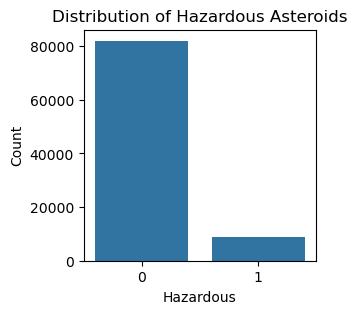

In [132]:
print("\n=== Targeted Feature (Hazardous) ===\n")
plt.figure(figsize=(3, 3))
sns.countplot(x='hazardous', data=df)
plt.title('Distribution of Hazardous Asteroids')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.show()

#### Seaborn checks the original values stored in the DataFrame’s metadata (like categorical mappings).So True/False was printed on X-axis rather Encoded values.


=== Numerical Features ===



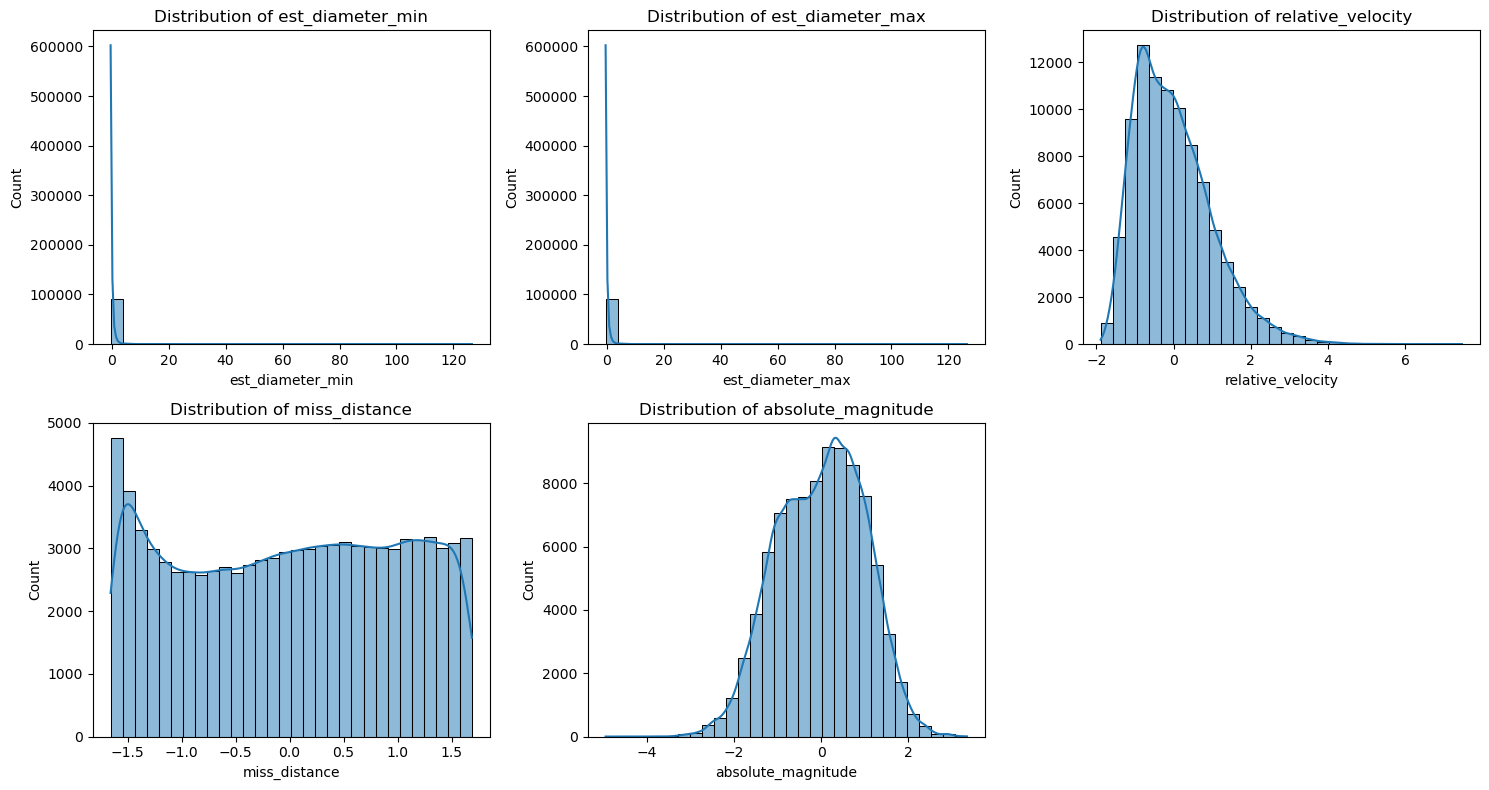

In [134]:
print("\n=== Numerical Features ===\n")
plt.figure(figsize=(15, 8 ))  # Width=15 (3*5), Height=4 per row

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#### It is necessary to see data distribution before diving into it.

### 3.2 - Bivariate Analysis ( Correlation Analysis )


=== Correlation Analysis ===



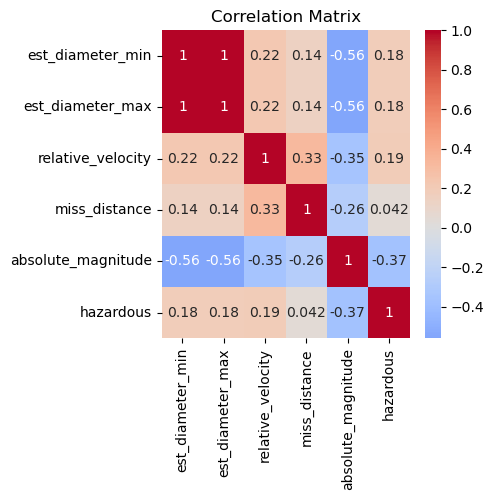

In [137]:
print("\n=== Correlation Analysis ===\n")
# Calculate correlation matrix
corr_matrix = df[numerical_features + ['hazardous']].corr()

# Plot heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## 3.3 - Outlier Analysis

### 3.3.1 - Outlier Detection


=== Outlier Detection ===



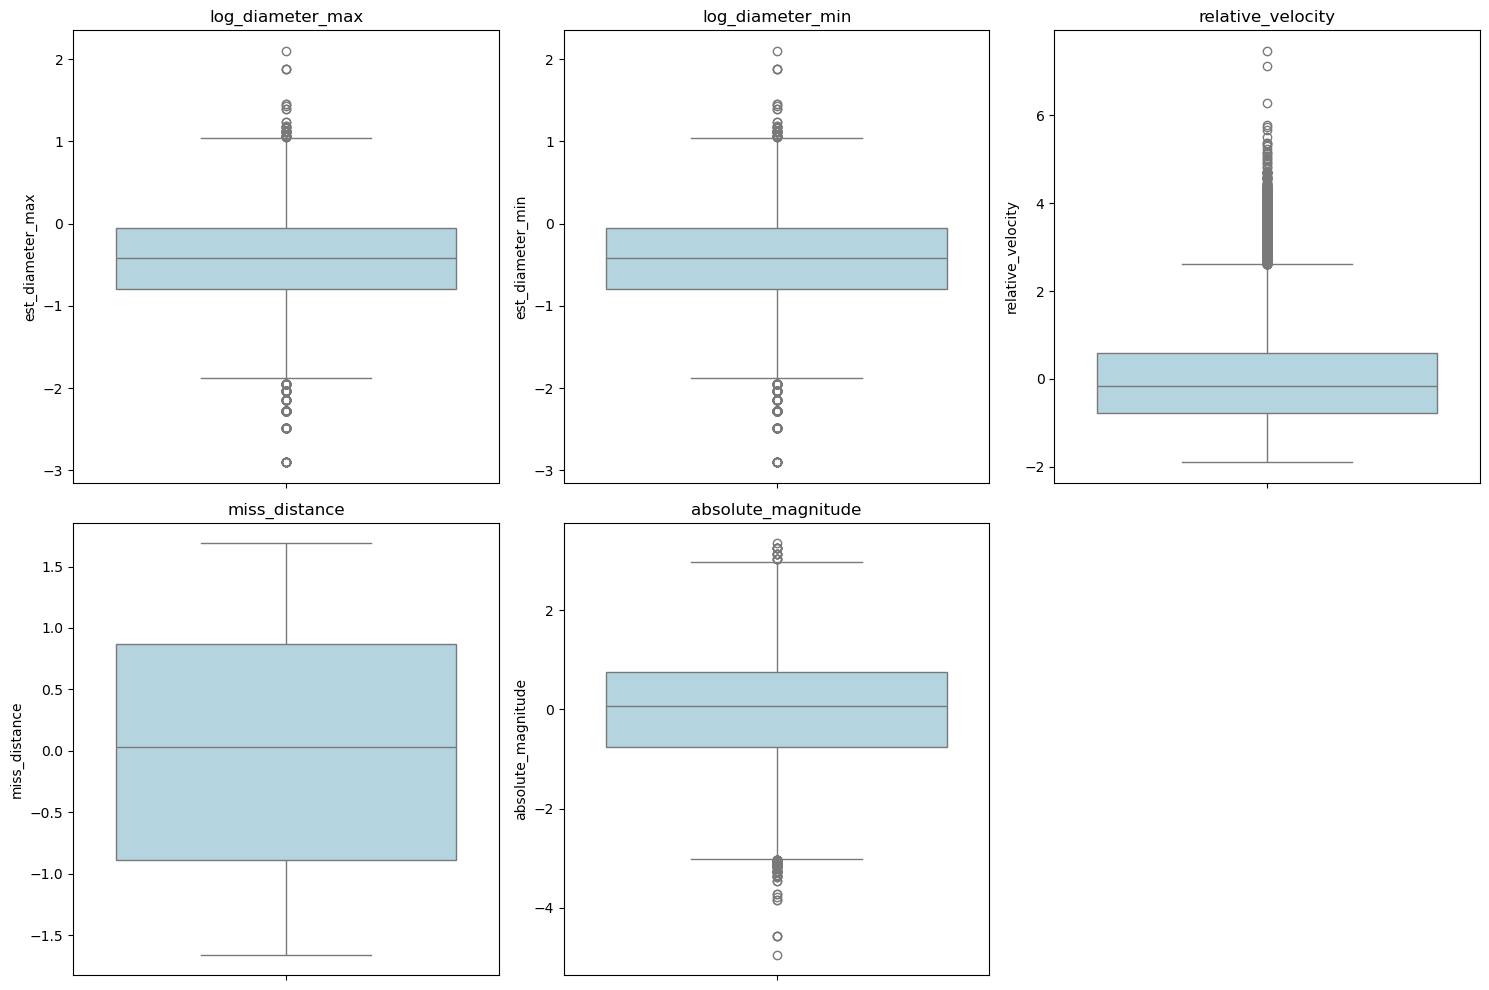

In [140]:
print("\n=== Outlier Detection ===\n")

# Calculating log values safely.
def safe_log(x):
    return np.log10(x) if x > 0 else np.nan

#Log_diameters are used for boxplots as the original data are raised in exponential.
log_max = df['est_diameter_max'].apply(safe_log)
log_min = df['est_diameter_min'].apply(safe_log)

# Combine all features to plot
features_to_plot = {
    'log_diameter_max': log_max,
    'log_diameter_min': log_min,
    'relative_velocity': df['relative_velocity'],
    'miss_distance': df['miss_distance'],
    'absolute_magnitude': df['absolute_magnitude']
}

plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(features_to_plot.items(), 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(y=data, color='lightblue')
    plt.title(name)
    
plt.tight_layout()
plt.show()

##  3.3.2 - Scatter Plots

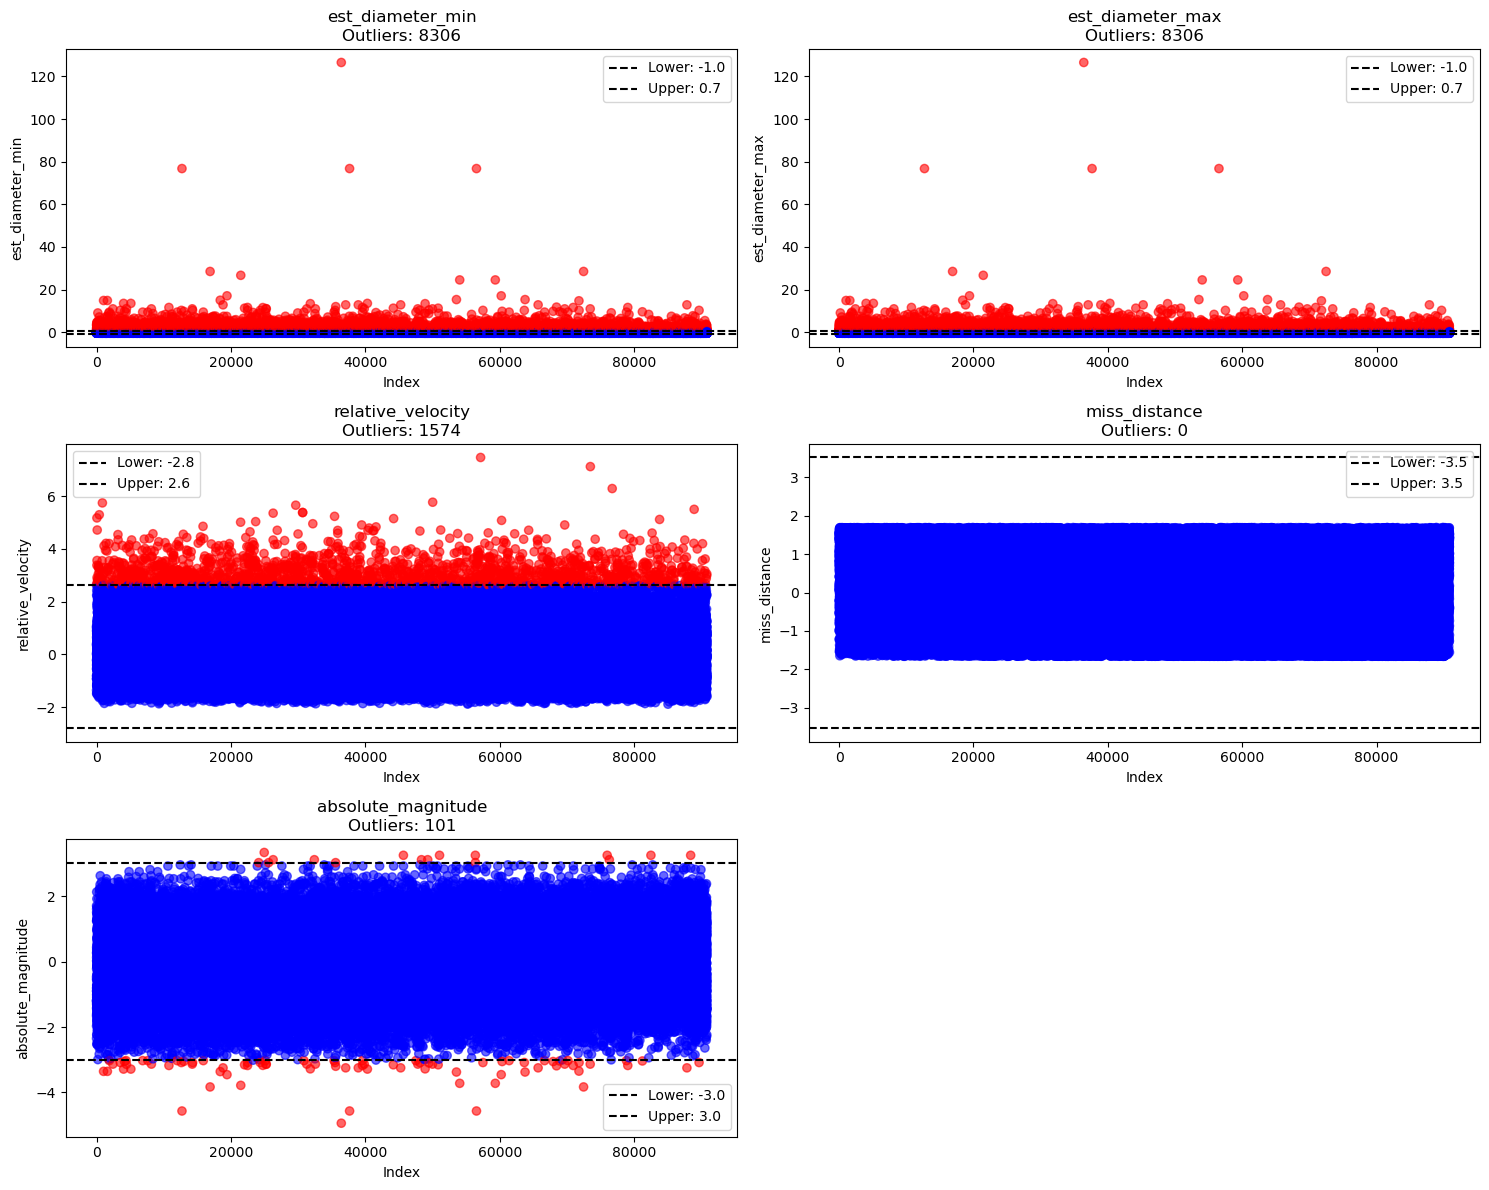

In [142]:
# Function to detect outliers using IQR method
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Create scatter plots with outlier bounds
plt.figure(figsize=(15, 12))


for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)  # 3 rows, 2 columns of subplots
    
    # Getting outliers
    is_outlier = detect_outliers(df[col])
    
    # Calculating bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Plotting all points (normal in blue, outliers in red)
    plt.scatter(x=df.index, 
               y=df[col], 
               c=np.where(is_outlier, 'red', 'blue'),
               alpha=0.6)
    
    # Adding bound lines
    plt.axhline(lower_bound, color='black', linestyle='--', 
                label=f'Lower: {lower_bound:.1f}')
    plt.axhline(upper_bound, color='black', linestyle='--', 
                label=f'Upper: {upper_bound:.1f}')
    
    plt.title(f'{col}\nOutliers: {is_outlier.sum()}')
    plt.xlabel('Index')
    plt.ylabel(col)
    
    plt.legend()

plt.tight_layout()
plt.show()

## 3.3.3 - Outlier Data Analysis

In [144]:
# Calculate outlier counts and percentages
outlier_counts = {}
for col in numerical_features:
    outlier_counts[col] = detect_outliers(df[col]).sum()

# Create DataFrame with outlier information
outlier_df = pd.DataFrame({
    'Feature': list(outlier_counts.keys()),
    'Outlier_Count': list(outlier_counts.values())
})

# Calculate percentage and round to 2 decimal places
outlier_df['Outlier_Percentage'] = (outlier_df['Outlier_Count'] / len(df) * 100).round(2)

# Display the results
print("\nOutlier Count and Percentage for NEO Dataset:")
display(outlier_df)

# Print summary statistics
print(f"\nTotal data points: {len(df)}")


Outlier Count and Percentage for NEO Dataset:


,Feature,Outlier_Count,Outlier_Percentage
0,est_diameter_min,8306,9.14
1,est_diameter_max,8306,9.14
2,relative_velocity,1574,1.73
3,miss_distance,0,0.00
4,absolute_magnitude,101,0.11



Total data points: 90836


## 3.3.4 - Outlier Analysis Summary
    

#### In the context of Near-Earth Objects (NEOs), 
Outliers often represent critical real-world phenomena (e.g., extremely large/hazardous asteroids). Removing them can distort  model’s ability to predict rare but high-impact events. Below is a breakdown of outliers in key columns and why they matter:

-   Est_diameter_min / Est_diameter_max (km): 
       - Outliers :
         - Extremely large diameters (e.g., >1 km).
       - Why we should keep ?
          - Large asteroids pose higher impact risks.
          - Removing them would ignore the most hazardous objects.
-  Relative_velocity (km/s):
      - Outliers :
          - Very high velocities (e.g., >30 km/s).
      - Why we should keep ?
          - High-velocity asteroids are more likely to be hazardous due to kinetic energy (KE = 0.5mv²).
-  Miss_distance (km) :
      - Outliers :
        - Extremely close approaches (e.g., <1M km).
      - Why we should keep ?
        - Close-approaching asteroids are primary candidates for hazard monitoring.
-  absolute_magnitude (brightness) :
      - Outliers :
        -  Very low values (e.g., <15, indicating extremely bright/large objects).
      - Why we should keep ?
        - Low absolute magnitude correlates with larger, more dangerous objects.
-  sentry_object (True/False) :
      - Outliers :
        - Rare True values (NASA-monitored objects).
      - Why we should keep ?
        - These are by definition high-risk objects—removing them would cripple the model.

## 3.4 - Getting Insights

### Key Insights After EDA & Preprocessing
- Data Quality
    - No missing values or duplicates were found in the dataset.
    - All columns have been type-corrected and are ready for modeling.
- Feature Distributions
    - Most NEOs are small in size (diameter), with a few very large outliers.
    - Relative velocity and miss distance show wide, right-skewed distributions; most NEOs pass Earth at large distances, but a few come much closer.
    - Absolute magnitude (brightness) is inversely related to size: brighter objects tend to be larger.
- Target Variable (hazardous)
    - The dataset is imbalanced: only a small fraction of NEOs are classified as hazardous.
    - Hazardous NEOs tend to have larger diameters and smaller miss distances.
- Categorical Features
    - orbiting_body contains only "Earth" and was dropped as it provides no predictive value.
    - sentry_object is a rare flag; most NEOs are not tracked by the Sentry system.
- Correlations & Relationships
    - Larger, faster, and closer NEOs are more likely to be hazardous.
    - No strong correlation between sentry_object and physical features, but Sentry objects may be more closely monitored if hazardous.
- Data Readiness
    - All relevant features are encoded and scaled.
    - The dataset is now suitable for feature selection and model building.

## 4. Model Building and Evaluation
- Train/Test Split:
    - Split data into training (80%) and test sets (20%).
- Balancing the data ( Mainly the Target Variable which is imbalance ):
    - Using SMOTE (Synthetic Minority Oversampling Technique)
- Model Selection and Evaluation :
    - Linear Perceptron :
       - Getting Metrics(Accuracy,Precision,recall,F1-Score)
       - Confusion Matrix
    - KNN for ( k = 1 to 10 )
    - KNN ( for k = 5 ) :
       - Getting Metrics(Accuracy,Precision,recall,F1-Score)
       - Confusion Matrix
    - KNN ( for k = 9 ) :
       - Getting Metrics(Accuracy,Precision,recall,F1-Score)
       - Confusion Matrix
    - Decision Tree :
       - Getting Metrics(Accuracy,Precision,recall,F1-Score)
       - Confusion Matrix    

### 4.1 - Train/Test Split & Balancing Data :

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Selecting features and target feauture
X = df[['est_diameter_min','est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]
y = df['hazardous']  # We have Encoded it previously to 0/1 in preprocessing step.

# Spliting data (before SMOTE to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Class distribution after SMOTE:", dict(zip(*np.unique(y_train_resampled, return_counts=True))))

Class distribution before SMOTE: {0: 65557, 1: 7111}
Class distribution after SMOTE: {0: 65557, 1: 65557}


### 4.2 - Model Selection and Evaluation :

In [153]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report,confusion_matrix

# Lists for storing the data for all models.
recall_all = []
accuracy_all = []
precision_all = []

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Hazardous', 'Hazardous'],
                yticklabels=['Non-Hazardous', 'Hazardous'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#### 4.2.1 - Linear Perceptron

=== Perceptron with SMOTE ===

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     16439
           1       0.29      0.96      0.45      1729

    accuracy                           0.78     18168
   macro avg       0.64      0.86      0.65     18168
weighted avg       0.93      0.78      0.82     18168



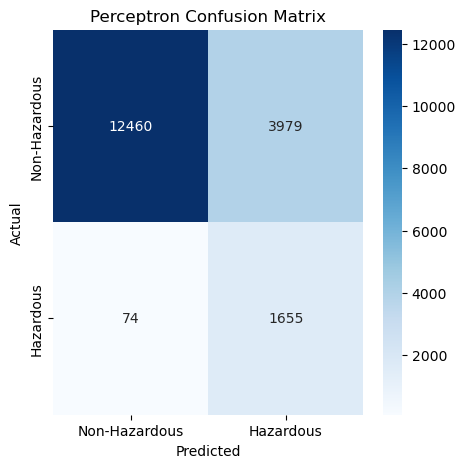

In [155]:
from sklearn.linear_model import Perceptron

# Initialize and train
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train_resampled, y_train_resampled)
y_pred = perceptron.predict(X_test)

print("=== Perceptron with SMOTE ===\n")
print(classification_report(y_test, y_pred))

#Scores storing in a list.
recall_all.append(recall_score(y_test, y_pred))
accuracy_all.append(accuracy_score(y_test, y_pred))
precision_all.append(precision_score(y_test, y_pred))

#Plotting Confusion Matrix
plot_confusion_matrix(y_test, y_pred, "Perceptron Confusion Matrix") #defined function

#### 4.2.2 - KNN for ( k = 1 to 10 )

In [ ]:
#k-nearest neighbours classifier
from sklearn.neighbors import KNeighborsClassifier

recall=[]
precision=[]
accuracy=[]
for k in range(1,10):
  #Training the knn model and predicting results for testing data using the knn model is done below.
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_resampled,y_train_resampled)
  y_pred=knn.predict(X_test)
  recall.append(recall_score(y_test,y_pred))
  accuracy.append(accuracy_score(y_test,y_pred))
  precision.append(precision_score(y_test,y_pred))
    
plt.plot(range(1,10),recall,label='recall of knn model',marker='o')
plt.plot(range(1,10),accuracy,label='accuracy of knn model',marker='x')
plt.plot(range(1,10),precision,label='precision of knn model',marker='*')
plt.xlabel('k-value')
plt.legend()
plt.show()

#### 4.2.3 - KNN ( for k = 5 )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN with k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_resampled, y_train_resampled)
y_pred_knn5 = knn5.predict(X_test)

print("=== KNN (k=5) with SMOTE ===\n")
print(classification_report(y_test, y_pred_knn5))

#Scores storing in a list.
recall_all.append(recall_score(y_test, y_pred_knn5))
accuracy_all.append(accuracy_score(y_test, y_pred_knn5))
precision_all.append(precision_score(y_test, y_pred_knn5))

#Plotting Confusion Matrix
plot_confusion_matrix(y_test, y_pred_knn5, "KNN (k=5) Confusion Matrix") #defined function

#### 4.2.4 - KNN ( for k = 9 )

In [ ]:
# KNN with k=9
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X_train_resampled, y_train_resampled)
y_pred_knn9 = knn9.predict(X_test)

print("=== KNN (k=9) with SMOTE ===\n")
print(classification_report(y_test, y_pred_knn9))

#Scores storing in a list.
recall_all.append(recall_score(y_test, y_pred_knn9))
accuracy_all.append(accuracy_score(y_test, y_pred_knn9))
precision_all.append(precision_score(y_test, y_pred_knn9))

#Plotting Confusion Matrix
plot_confusion_matrix(y_test, y_pred_knn9, "KNN (k=9) Confusion Matrix")#defined function

#### 4.2.5 - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train (no scaling needed for trees)
tree = DecisionTreeClassifier(random_state=42,max_depth=5,min_samples_leaf=10)
tree.fit(X_train_resampled, y_train_resampled)
y_pred_tree = tree.predict(X_test)

print("=== Decision Tree with SMOTE ===\n")
print(classification_report(y_test, y_pred_tree))

#Scores storing in a list.
recall_all.append(recall_score(y_test, y_pred_tree))
accuracy_all.append(accuracy_score(y_test, y_pred_tree))
precision_all.append(precision_score(y_test, y_pred_tree))

#Plotting Confusion Matrix
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree Confusion Matrix")#defined function

## 5. Interpretation and Insights
- Feature Importance ( From Decision tree ):
  - Discuss which features are most influential in predicting hazardous objects.
- Model and Insights :
  - From Confusion Matrices and Classification Reports.
- Final Scoring of Models 


### 5.1 - Feature Importance ( From decision tree )

In [ ]:
# Get feature importances from the Decision Tree
feature_importances = tree.feature_importances_

# Creating a DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

print("\n=== Decision Tree Feature Importances ===")
importance_df

In [ ]:
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Feature Importances (from Decision tree)")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 ## 5.2 - Models and Insights

### 1. Perceptron
- Precision-Recall Tradeoff:
    - Non-Hazardous (0): High precision (0.99) but mediocre recall (0.76).
    - Hazardous (1): Terrible precision (0.29) but excellent recall (0.96).
- Confusion Matrix:
    - 12,460 TN | 3,979 FP (False alarms)
    - 74 FN (Dangerous misses) | 1,655 TP
#### Key Insight:
Flags too many safe asteroids as hazardous (high FP) but catches most true hazards (high recall). Unreliable due to low precision for hazardous class.


### 2. KNN (k=5)
- Precision-Recall Tradeoff:
    - Non-Hazardous (0): Solid precision (0.87) and recall (0.85).
    - Hazardous (1): Poor precision (0.35) but good recall (0.80).
- Confusion Matrix:
    - 13,971 TN | 2,468 FP
    - 418 FN | 1,311 TP
#### Key Insight:
Better balanced than Perceptron but still struggles with false positives. Recall for hazardous class drops to 80% (misses 20% of dangers).

### 3. KNN (k=9)
- Precision-Recall Tradeoff:
    - Non-Hazardous (0): Excellent precision (0.98) and recall (0.83).
    - Hazardous (1): Low precision (0.33) but strong recall (0.83).
- Confusion Matrix:
    - 13,566 TN | 2,873 FP
    - 300 FN | 1,429 TP
#### Key Insight:
Higher k reduces false positives but still misses 17% of hazardous asteroids (FN). Precision for hazards remains problematic.



### 4. Decision Tree 
- Precision-Recall Tradeoff:
    - Non-Hazardous (0):
        - Precision = 1.00: Every predicted safe asteroid is truly safe (no false positives).
        - Recall = 0.76: Misses 24% of safe asteroids (labeled incorrectly as hazardous).
    - Hazardous (1):
        - Precision = 0.30: Only 30% of predicted hazards are real (high false alarms).
        - Recall = 0.98: Catches 98% of truly hazardous asteroids (minimal misses).
- Confusion Matrix:
    - 12,541 TN (True Safe) | 3,898 FP (False Alarms)
    - 29 FN (Dangerous Misses) | 1,700 TP (True Hazards)

### Key Insight:
The model is overly aggressive—prioritizing recall (catching hazards) at the cost of precision (many false alarms).

### Best Model: KNN (k=5)
- Why?
    - Balanced Performance:
        - Recall = 0.80: Catches 80% of hazards (better than KNN k=9’s 83% but with fewer FPs).
        - Precision = 0.35: Higher than Decision Tree (0.30) and Perceptron (0.29).
    - Lowest False Alarms:
        - 2,468 FP vs. Decision Tree’s 3,898 (37% fewer false alerts).
    - Higher Accuracy (87%):

Better overall correctness than Decision Tree (78%) or Perceptron (78%).

## 5.3 - Final Scores of Models 

In [ ]:
 #Models with their respective recall,accuracy and precision.
 dt={'model'    : ['Perceptron','KNN(n=5)','KNN(n=9)','Decision tree'],
     'recall'   : recall_all,
      'accuracy' : accuracy_all,
      'precision' : precision_all
    }
import pandas as pd
data=pd.DataFrame(dt)
data